## Plot zonal-mean total column ozone

In this exercise you will read-in various total column ozone (TCO) datasets from a variety of sources:

1. Observations from Bodeker Scientific
2. Processed UKCA data submitted to phase 1 of the Chemistry-Climate Model Initative (CCMI1)
3. A ensemble of processed UKCA submitted to CCMI2022
4. UM-UKCA pp-file output run as part of the NERC ACSIS project

Some example plots will be given, along with suggested exercises for you to complete.

In [1]:
import iris
import iris.analysis
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import cf_units

In [2]:
# define the locations of the various datasets
# CCMI2022 refD1 ensemble
ensdata='/home/ubuntu/Tutorials/UMvn13.0/data/toz_Amon_UKESM1-StratTrop_refD1_r?i1p1f2_gn_19600101-20190101.nc'
# CCMI1 refC1
ccmidata='/home/ubuntu/Tutorials/UMvn13.0/data/toz_monthly_UMUKCA-UCAM_refC1_r1i1p1_*.nc'
# UKCA model data from ACSIS project, nudged to ERA5
ukcadata='/home/ubuntu/Tutorials/UMvn13.0/data/u-*/apm.pp/*.pp'
# Bodeker Scientific TCO dataset - https://www.bodekerscientific.com/data/total-column-ozone
# this has been preprocessed into a single file using ncks, ncatted, and ncrcat
# for i in `ls *.nc`; do echo $i; ncks -O --mk_rec_dmn time $i $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a created,global,d,, $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,longitude,o,c,degrees_east $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,latitude,o,c,degrees_north $i; done
# ncrcat BSFilledTCO_V3.4.1_????_Monthly.nc ../BSFilledTCO_V3.4.1_Monthly.nc
obsdata='/home/ubuntu/Tutorials/UMvn13.0/data/Bodeker_3.4.1/*.nc'
# We would like to thank Bodeker Scientific, funded by the New Zealand Deep South National 
# Science Challenge, for providing the combined NIWA-BS total column ozone database.

In [3]:
# read observations
obs=iris.load_cube(obsdata,'equivalent_thickness_at_stp_of_atmosphere_ozone_content')

In [4]:
# zonal mean
obs_zm=obs.collapsed('longitude',iris.analysis.MEAN)

/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/coords.py:2223: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [5]:
# levels for plotting
clevs=np.arange(120,500,20)

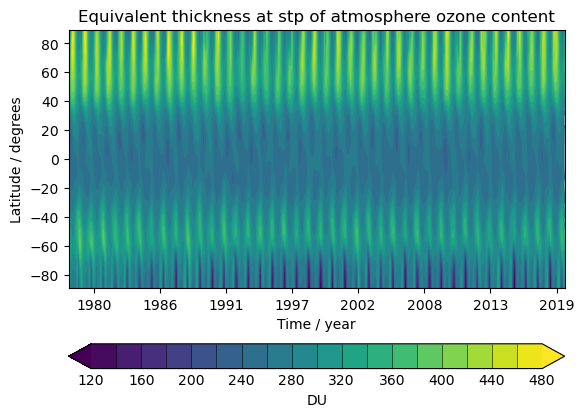

In [6]:
# plot the data
qplt.contourf(obs_zm, clevs, extend='both')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlabel('Time / year')
plt.show()

In [7]:
# read-in the UM-UKCA pp data, TCO is in STASH code s50i219
ukca=iris.load_cube(ukcadata,iris.AttributeConstraint(STASH='m01s50i219'))

/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/fileformats/rules.py:353: UserWarning: Unable to create instance of HybridHeightFactory. The source data contains no field(s) for 'orography'.
  warnings.warn(msg.format(factory=factory_name))


In [8]:
ukca_zm=ukca.collapsed('longitude',iris.analysis.MEAN)

/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/coords.py:2223: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


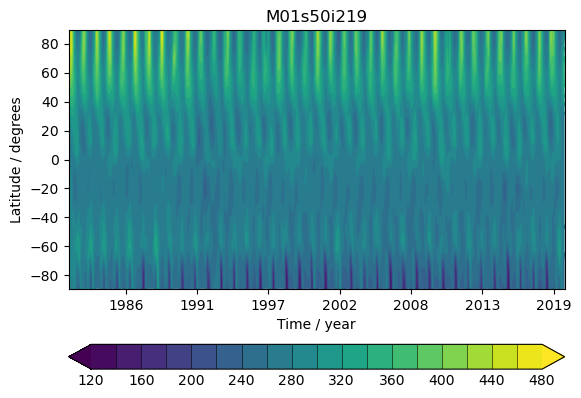

In [9]:
qplt.contourf(ukca_zm, clevs, extend='both')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlabel('Time / year')
plt.show()

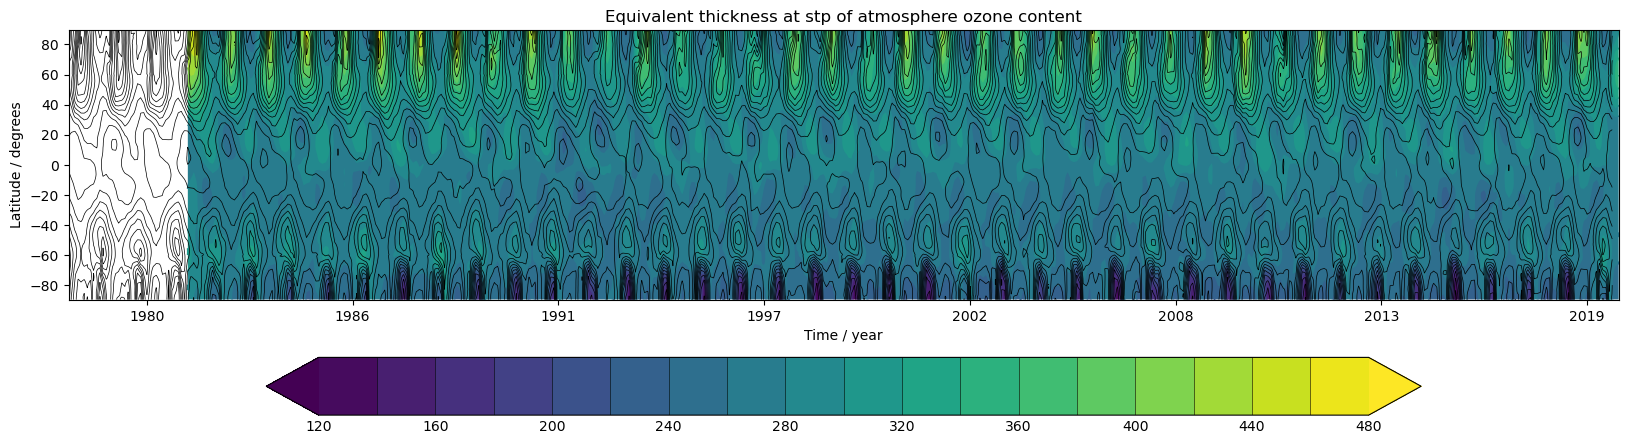

In [10]:
# quite a lot of data so stretch the plot
plt.figure(figsize=(20,5))
qplt.contourf(ukca_zm, clevs, extend='both')
qplt.contour(obs_zm, clevs, colors='k', linewidths=0.5)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlabel('Time / year')
plt.show()

In [11]:
# 10-year files for CCMI1, need to remove differing attributes
inccmi=iris.load(ccmidata,'toz')
attrs=iris.util.equalise_attributes(inccmi)
# concatinate in time
ccmi=inccmi.concatenate_cube()

/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'toz'
  warnings.warn(
/tmp/ipykernel_15920/3745885181.py:2: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  inccmi=iris.load(ccmidata,'toz')
/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'toz'
  warnings.warn(
/tmp/ipykernel_15920/3745885181.py:2: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  inccmi=iris.load(ccmidata,'toz')
/home/ubuntu/miniconda3/lib/py

In [12]:
ccmi_zm=ccmi.collapsed('longitude',iris.analysis.MEAN)

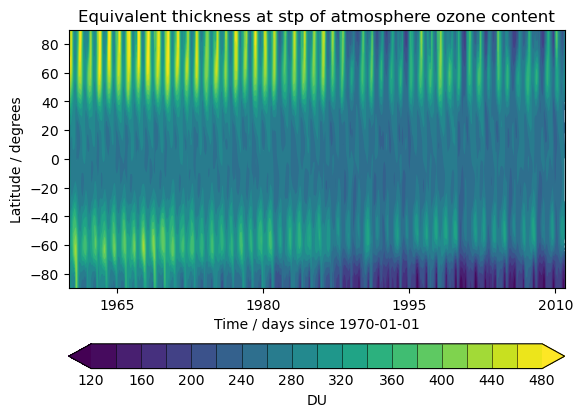

In [13]:
# when plotting here note that run starts in 1960 and ends in 2011
qplt.contourf(ccmi_zm, clevs, extend='both')
## for some reason formatter & label changes not needed here, and get years wrong if used
plt.show()

In [14]:
# extract only 1978 data from CCMI cube
# time constraint for extracting data
pdt1=iris.time.PartialDateTime(year=1978, month=1, day=1)
tconstr_1978=iris.Constraint(time=lambda cell: pdt1 <= cell.point)
ccmi_1978=ccmi_zm.extract(tconstr_1978)

# data ends in 2011, so do the same for the obs
pdt2=iris.time.PartialDateTime(year=2012, month=1, day=1)
tconstr_2011=iris.Constraint(time=lambda cell: cell.point < pdt2)
obs_2011=obs_zm.extract(tconstr_2011)

In [15]:
# regularise the time units to enable plotting correctly
unit=cf_units.Unit('days since 1970-01-01', calendar='360_day')

ccmi_1978.coord('time').convert_units(unit)

# these are Gregorian calendar, do a rough conversion
obs_2011.coord('time').points=obs_2011.coord('time').points*(360.0/365.24)
obs_2011.coord('time').units=unit=cf_units.Unit(str(obs_2011.coord('time').units), calendar='360_day')
obs_2011.coord('time').convert_units(unit)

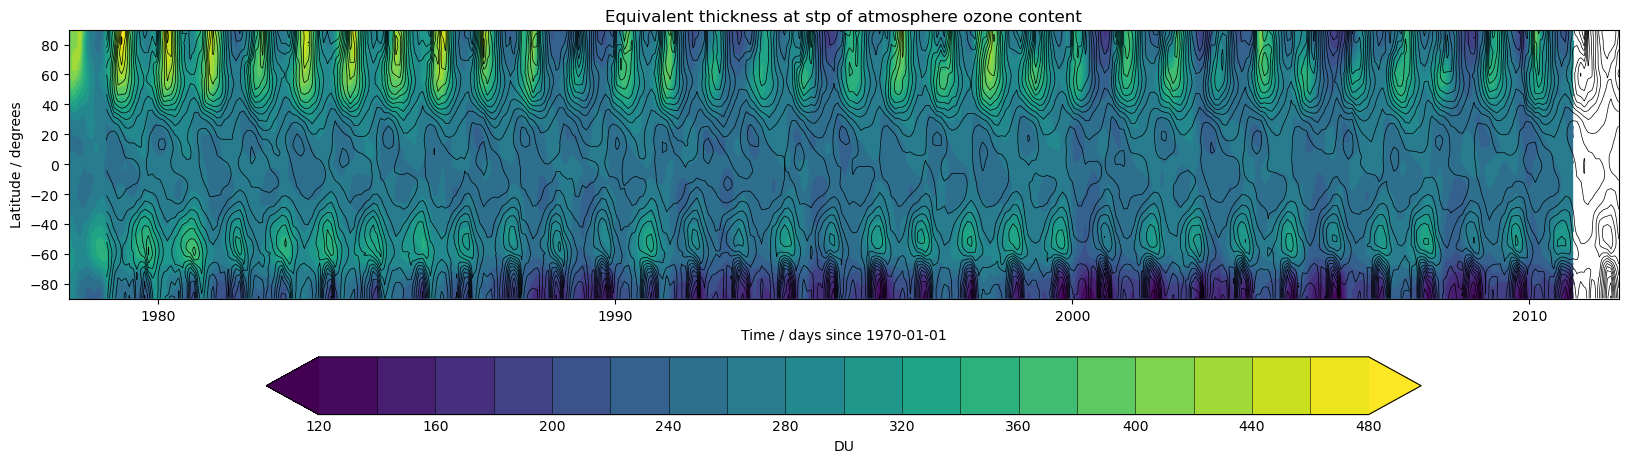

In [16]:
# quite a lot of data so stretch the plot
plt.figure(figsize=(20,5))
qplt.contourf(ccmi_1978, clevs, extend='both')
qplt.contour(obs_2011, clevs, colors='k', linewidths=0.5)
## for some reason formatter & label changes not needed here, and get years wrong if used
plt.show()

### Further exercises to try:

1. Plot members from the CCMI2022 ensemble
2. Produce a plot of the ensemble mean of the 3 ensemble members. How would you go about calculating the ensemble mean?